In [1]:
import requests
import pandas as pd
import lxml
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (100, 2),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)


from sklearn.metrics import r2_score

page = requests.get('http://health.gatech.edu/coronavirus/health-alerts')
globfig=(15,4)

In [2]:
page = page.text[page.text.index('<h3>Current Month</h3>'):]
dfs = pd.read_html(page)

In [3]:
megadf = pd.concat(dfs)

In [4]:
megadf

,Date Reported,Position,Date Last on Campus,Campus Impact
0,"August 11, 2020",Student,"August 10, 2020",The student lives off campus; all affected ind...
1,"August 10, 2020",Student,Currently living off campus,The student lives off campus and hasn’t had an...
2,"August 10, 2020",Student,"May 11, 2020",The student hasn’t had any campus contacts; no...
3,"August 10, 2020",Staff,NaN,The individual works off site and out of state...
4,"August 8, 2020",Student,"August 6, 2020",The infection occurred in early July; no campu...
...,...,...,...,...
11,"March 27, 2020",Staff member,"March 9, 2020",Electrical and Computer Engineering building. ...
12,"March 26, 2020",Student,"March 13, 2020",The student reported that their symptoms start...
13,"March 26, 2020",Student,"March 12, 2020",The student reported that their symptoms start...
14,"March 25, 2020",Staff member,"March 18, 2020",Paper Tricentennial Building as part of the Re...


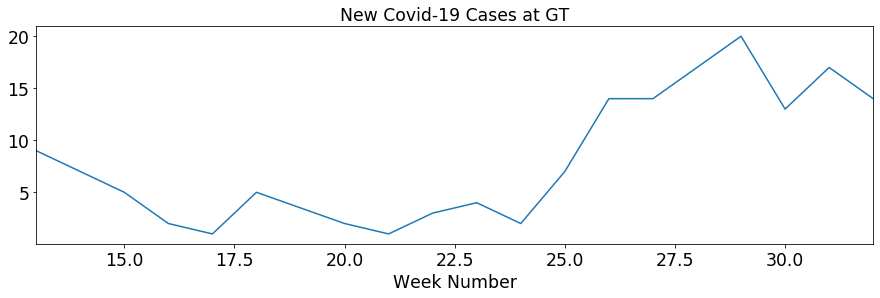

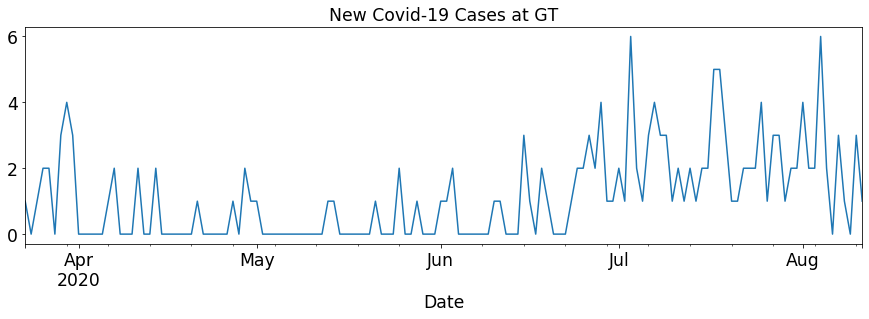

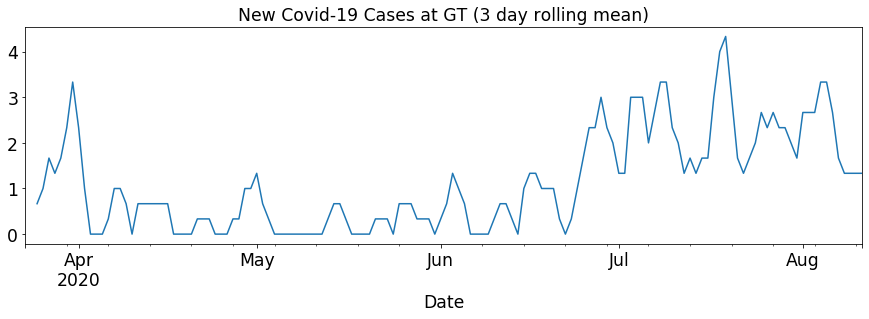

In [5]:
megadf["Date Reported"] = megadf["Date Reported"].astype("datetime64")
megadf.groupby(megadf["Date Reported"].dt.week)[['Date Reported']].count()[:-1].plot(
    kind="line",legend=None,title="New Covid-19 Cases at GT",figsize=globfig).set_xlabel('Week Number')
plt.savefig('gtweekly.png')
megadf.groupby(megadf["Date Reported"].dt.date)[['Date Reported']].count().asfreq(
    freq='1D',fill_value=0).plot(
    kind="line",legend=None,title="New Covid-19 Cases at GT",figsize=globfig).set_xlabel('Date')
plt.savefig('gtdaily.png')
megadf.groupby(megadf["Date Reported"].dt.date)[['Date Reported']].count().asfreq(
    freq='1D',fill_value=0).rolling(3).mean().plot(
    kind="line",legend=None,title="New Covid-19 Cases at GT (3 day rolling mean)",figsize=globfig).set_xlabel('Date')
plt.savefig('gtdaily3day.png')


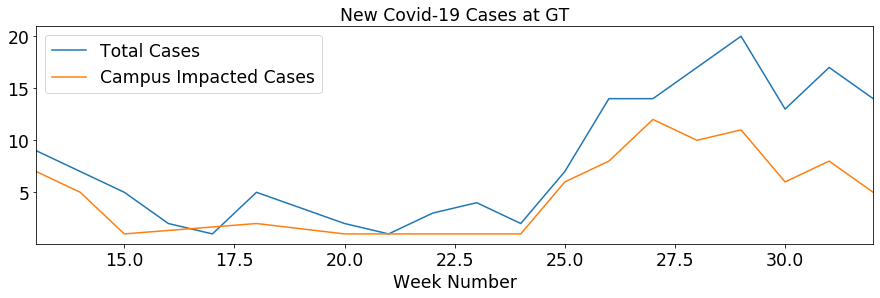

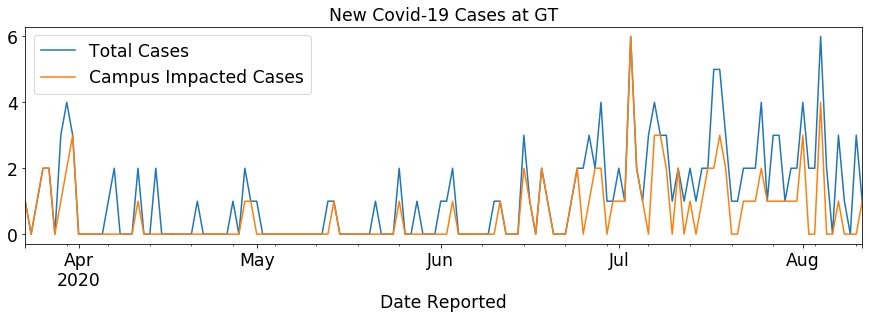

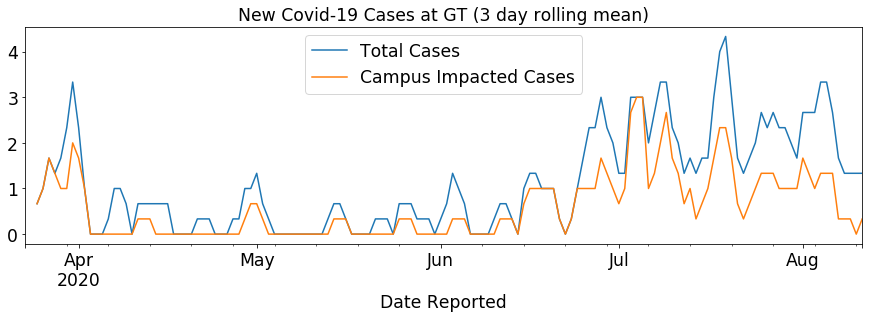

In [6]:
megadf["Date Reported"] = megadf["Date Reported"].astype("datetime64")
affected = megadf[~megadf["Campus Impact"].str.contains("impact")]

ax = megadf.groupby(megadf["Date Reported"].dt.week)[['Date Reported']].count()[:-1].plot(
    kind="line",legend=None,title="New Covid-19 Cases at GT",figsize=globfig)
affected.groupby(affected["Date Reported"].dt.week)[['Date Reported']].count()[:-1].plot(
    ax=ax,kind="line",legend=None,title="New Covid-19 Cases at GT",figsize=globfig).legend(
    ["Total Cases", "Campus Impacted Cases"])
ax.set_xlabel('Week Number')
plt.savefig('gtweeklyboth.png')


ax = megadf.groupby(megadf["Date Reported"].dt.date)[['Date Reported']].count().asfreq(
    freq='1D',fill_value=0).plot(kind="line",title="New Covid-19 Cases at GT",figsize=globfig)
affected.groupby(affected["Date Reported"].dt.date)[['Date Reported']].count().asfreq(
    freq='1D',fill_value=0).plot(
    ax=ax, kind="line",title="New Covid-19 Cases at GT",figsize=globfig).legend(
    ["Total Cases", "Campus Impacted Cases"])

plt.savefig('gtdailyboth.png')
ax = megadf.groupby(megadf["Date Reported"].dt.date)[['Date Reported']].count().asfreq(
    freq='1D',fill_value=0).rolling(3).mean().plot(
    kind="line",legend=None,title="New Covid-19 Cases at GT (3 day rolling mean)",figsize=globfig)
affected.groupby(affected["Date Reported"].dt.date)[['Date Reported']].count().asfreq(
    freq='1D',fill_value=0).rolling(3).mean().plot(
    ax=ax,kind="line",legend=None,title="New Covid-19 Cases at GT (3 day rolling mean)",figsize=globfig).legend(
    ["Total Cases", "Campus Impacted Cases"])
plt.savefig('gtdaily3dayboth.png')


In [7]:
# affected = megadf[~megadf["Campus Impact"].str.contains("impact")]
# pd.set_option('display.max_rows', None)

In [8]:
# affected

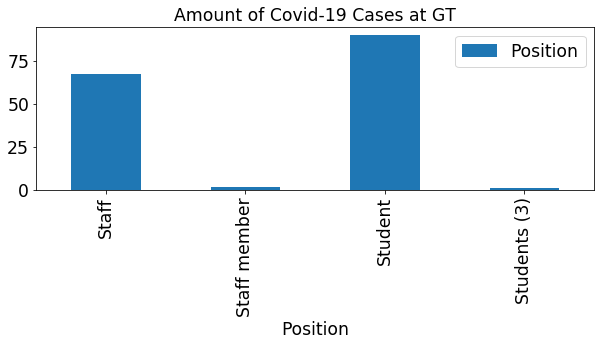

In [9]:
megadf.groupby(megadf["Position"])[['Position']].count()[:-1].plot(kind="bar",title="Amount of Covid-19 Cases at GT",figsize=(10,3))

In [10]:
# only_counts = megadf.groupby(megadf["Date Reported"].dt.week)[['Date Reported']].count()[:-1]

# ys = only_counts.iloc[:,0].to_numpy()
# xs = np.arange(len(ys))
# x_space = np.linspace(0,len(ys)+3)

# coef = np.polyfit(xs,ys,3,full=True)
# poly = np.poly1d(coef[0])
# y_pred = poly(xs)
# r2_score(ys,y_pred)

In [11]:
# y_space = poly(x_space)
# plt.plot(x_space,y_space,ys)

In [12]:
# xs = np.arange(len(ys))
# plt.plot(xs,ys,y_pred)